# 🌠 Meteorite Landings EDA using Python  

---

## 📂 About Dataset: Meteorite Landings  

This dataset provides a comprehensive collection of meteorite landings worldwide, compiled by The Meteoritical Society and available through NASA’s Open Data Portal.  

It includes 34,513 recorded meteorites with key details such as:  

- 🪨 **Name & Type** → Meteorite classification  
- ⚖️ **Mass (grams)** → Weight of the meteorite  
- 🌍 **Fell or Found** → Whether it was seen falling or discovered later  
- 📅 **Year** → The year of discovery or fall  
- 📌 **Location Data** → Latitude, longitude, and geo-coordinates  

---

> 🔗 **Source:**  
> 📌 Original Data Provider: *The Meteoritical Society*  
> 📌 Hosted by: *NASA Open Data Portal* 

---

## 🔍 Focus of Analysis: Exploratory Data Analysis (EDA)  

This analysis will focus on Exploratory Data Analysis (EDA) rather than predictive modeling.  

While the `fall` column, which indicates whether a meteorite's fall was witnessed ("Fell") or found later ("Found"), could technically be used as a target variable in a machine learning model, such an approach is not logically sound for this dataset.  

---

### ⚠️ Why Not Use Machine Learning?  

> The available features, such as mass, year, and location, do not cause a meteorite to be found versus witnessed falling.  
> They describe characteristics of the meteorite or its discovery location but do not determine the process of discovery.  

As a result, a model trained on this data would likely:  
- Learn spurious correlations  
- Memorize existing `fall` data instead of identifying meaningful patterns  
- Fail to generalize to new data  

---

### 🎯 The Goal: Insightful EDA  
Instead of predictive modeling, this analysis will:  
- Explore patterns, distributions, and relationships between variables  
- Identify interesting trends in meteorite landings  
- Provide meaningful insights into the dataset  

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## 2. Import Data

In [2]:
df=pd.read_csv("/kaggle/input/meteorite-landings-on-earth-data/Meteorite_Landings.csv")

## 3. Data Discovery

In [3]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Unnamed: 10
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB


In [5]:
round(df.describe())

,id,mass (g),year,reclat,reclong,Unnamed: 10
count,45716.0,45585.0,45425.0,38401.0,38401.0,0.0
mean,26890.0,13278.0,1992.0,-39.0,61.0,NaN
std,16861.0,574989.0,25.0,46.0,81.0,NaN
min,1.0,0.0,860.0,-87.0,-165.0,NaN
25%,12689.0,7.0,1987.0,-77.0,0.0,NaN
50%,24262.0,33.0,1998.0,-72.0,36.0,NaN
75%,40657.0,203.0,2003.0,0.0,157.0,NaN
max,57458.0,60000000.0,2101.0,81.0,354.0,NaN


### Understaing the Features Nametype & Recclass

In [6]:
df['nametype'].value_counts()

nametype
Valid     45641
Relict       75
Name: count, dtype: int64

In [7]:
df['recclass'].unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'L4', 'Aubrite',
       'Iron, IIAB', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'Pallasite', 'CO

### Check for missing values

In [8]:
df.isnull().sum()

name               0
id                 0
nametype           0
recclass           0
mass (g)         131
fall               0
year             291
reclat          7315
reclong         7315
GeoLocation     7315
Unnamed: 10    45716
dtype: int64

In [9]:
df=df.drop(columns=['Unnamed: 10','id','GeoLocation'])

In [10]:
df.isnull().sum()

name           0
nametype       0
recclass       0
mass (g)     131
fall           0
year         291
reclat      7315
reclong     7315
dtype: int64

## 4. Data Visualization

### 1. Histogram to Undetstand Distribution

In [11]:
df.columns = df.columns.str.replace(" ", "_")

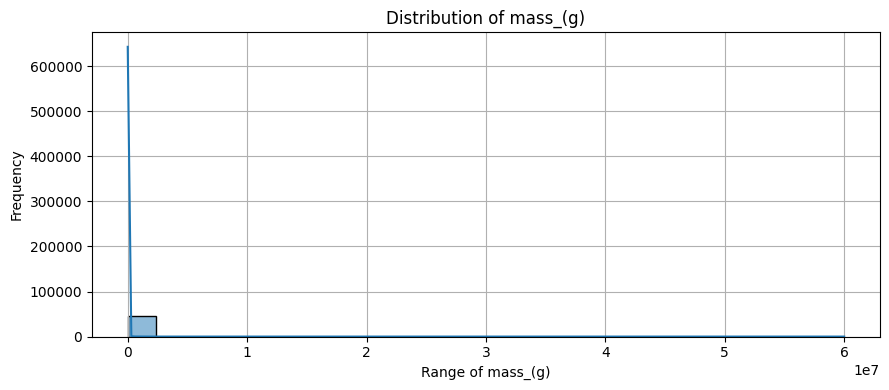

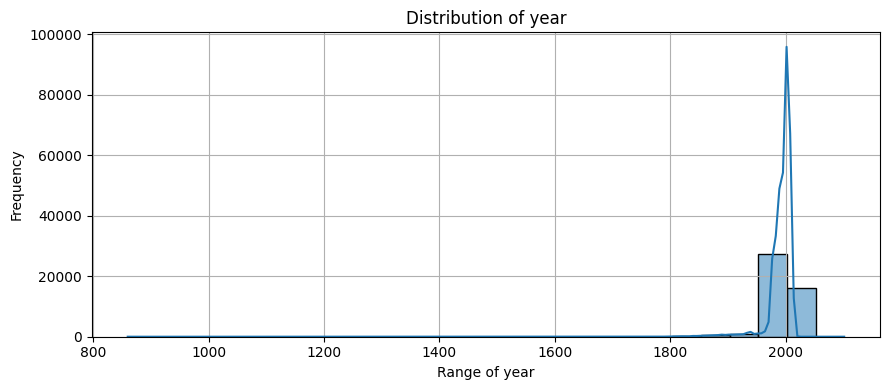

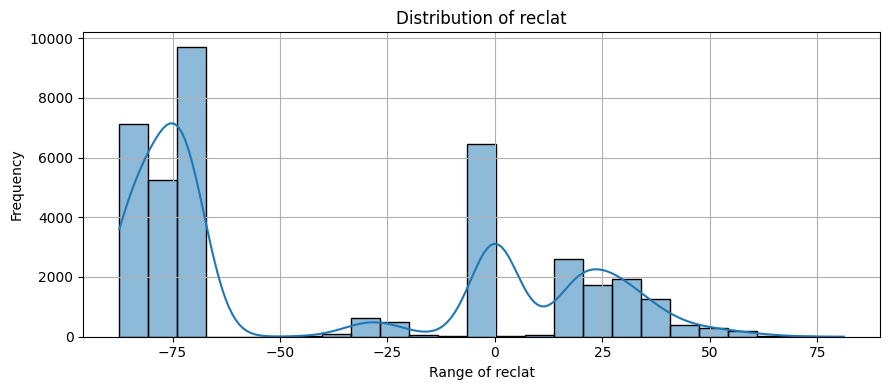

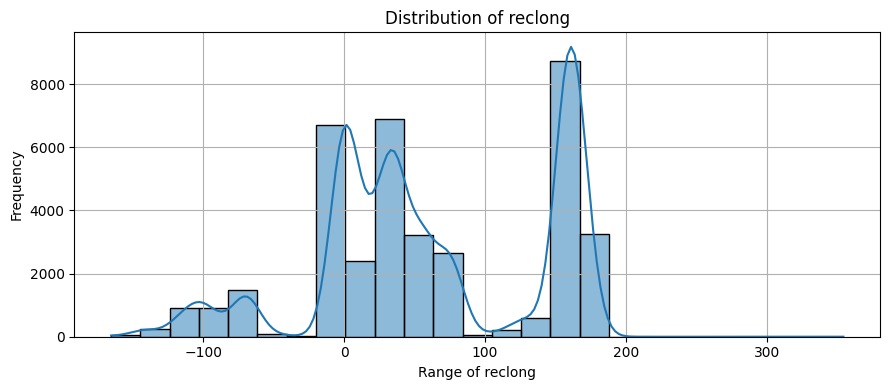

In [12]:
num_cols=['mass_(g)', 'year', 'reclat', 'reclong']
for i in num_cols:
  plt.figure(figsize=(9,4))
  sns.histplot(df[i],kde=True,bins=25)
  plt.title("Distribution of " +i)
  plt.xlabel("Range of " +i)
  plt.ylabel('Frequency')
  plt.grid()
  plt.tight_layout()
  plt.show()
  print("\n")

### 2. Heatmap Correlation

<Axes: >

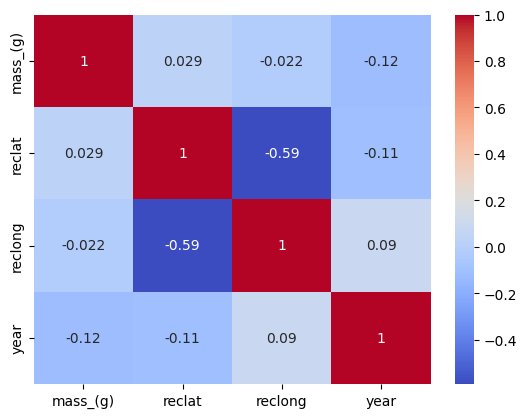

In [13]:
num_df = df[['mass_(g)','reclat', 'reclong','year']]
sns.heatmap(num_df.corr(),annot=True,cmap='coolwarm')

### 3. Studying the Area of Impact using Scatter Plot

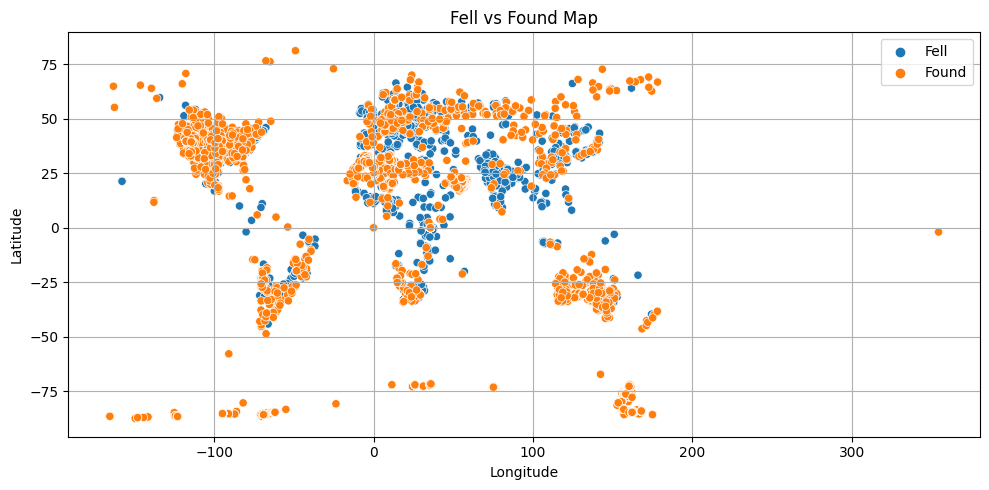

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='reclong',y='reclat',data=df,hue='fall')
plt.title('Fell vs Found Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

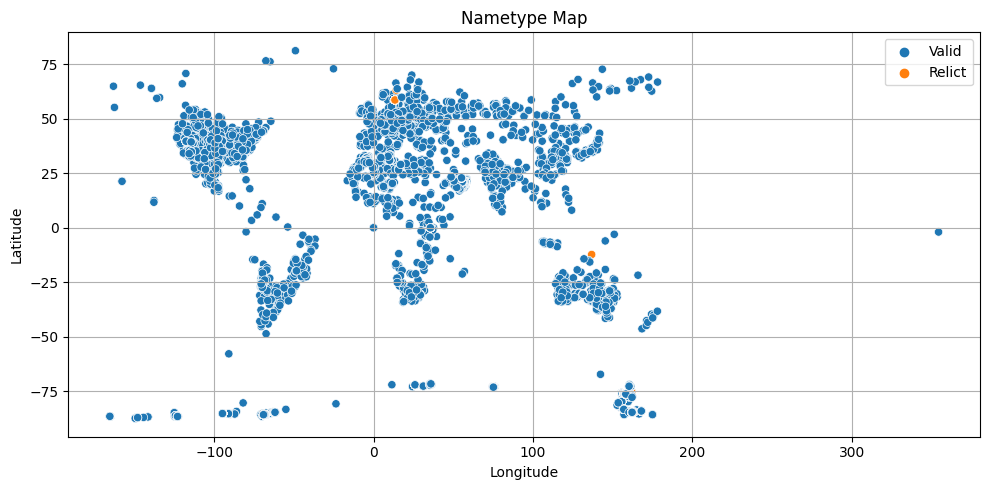

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='reclong',y='reclat',data=df,hue='nametype')
plt.title('Nametype Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

In [16]:
df['recclass'].value_counts()

recclass
L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: count, Length: 466, dtype: int64

### 4. Studying Impact of Top 25 Classes of Meteorite

In [17]:
top_25 = df['recclass'].value_counts().head(25).index
top_df = df[df['recclass'].isin(top_25)]

In [18]:
print(top_25)

Index(['L6', 'H5', 'L5', 'H6', 'H4', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2', 'H3',
       'L3', 'CO3', 'Ureilite', 'Iron, IIIAB', 'LL4', 'CV3', 'Diogenite',
       'Howardite', 'LL', 'Eucrite', 'Eucrite-pmict', 'E3', 'H5/6',
       'Mesosiderite'],
      dtype='object', name='recclass')


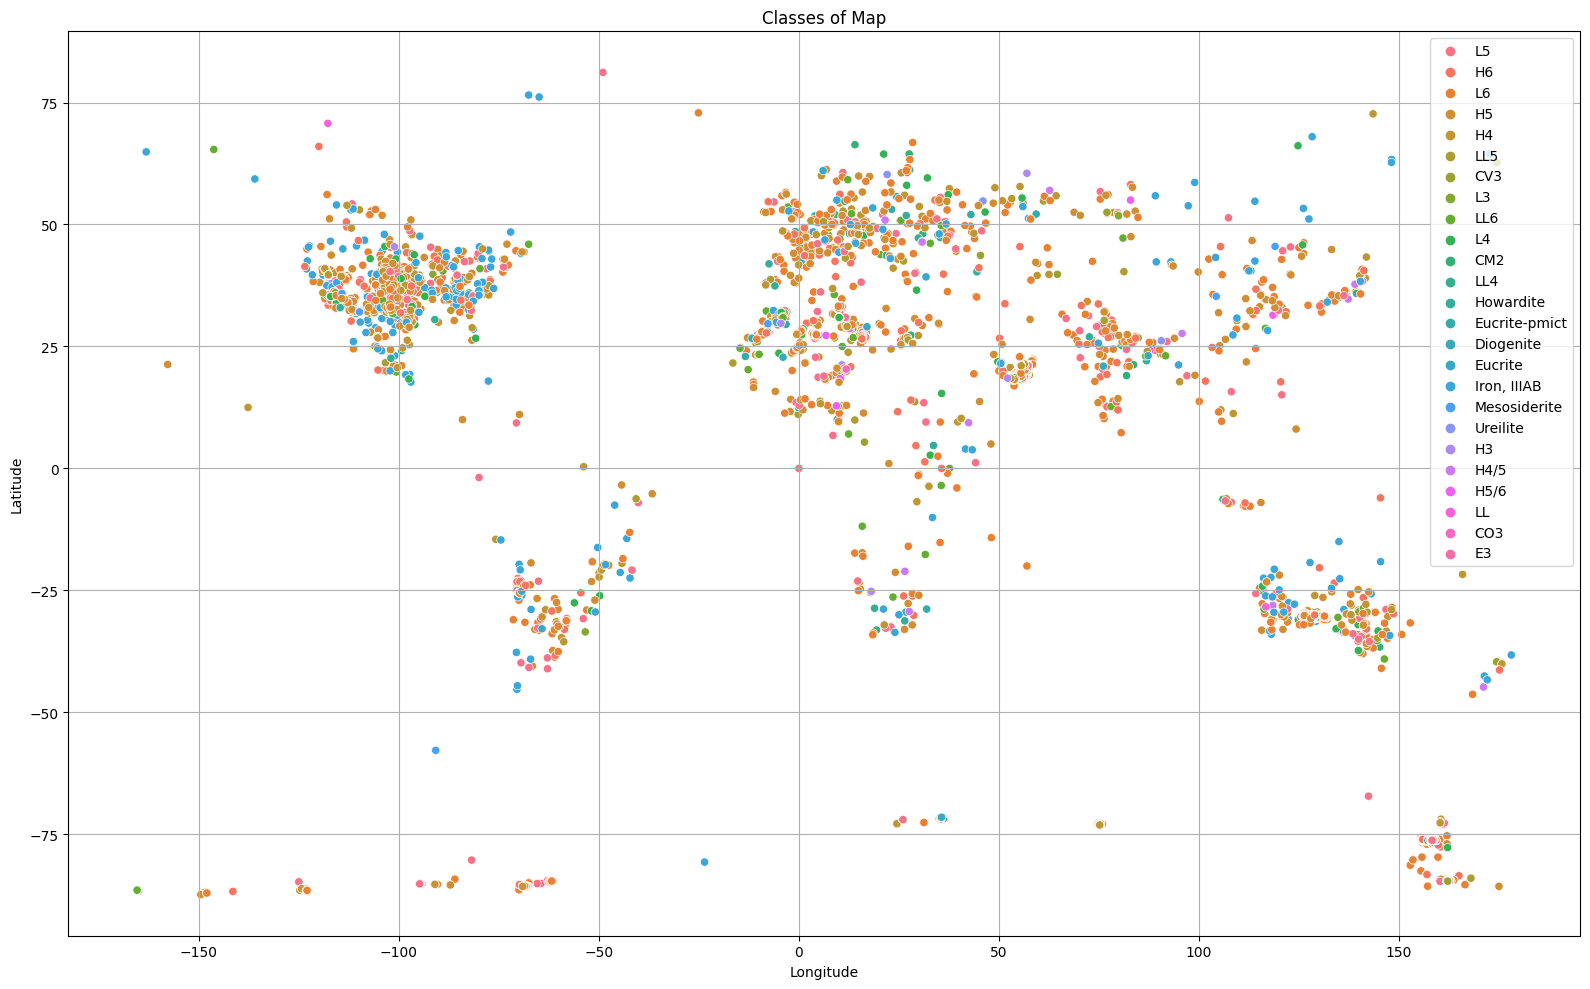

In [19]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='reclong',y='reclat',data=top_df,hue='recclass')
plt.title('Classes of Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

### Top 15 Meteroite Classes

In [20]:
top_15_classes=df['recclass'].value_counts().head(15).reset_index()
print(top_15_classes)

       recclass  count
0            L6   8285
1            H5   7142
2            L5   4796
3            H6   4528
4            H4   4211
5           LL5   2766
6           LL6   2043
7            L4   1253
8          H4/5    428
9           CM2    416
10           H3    386
11           L3    365
12          CO3    335
13     Ureilite    300
14  Iron, IIIAB    285


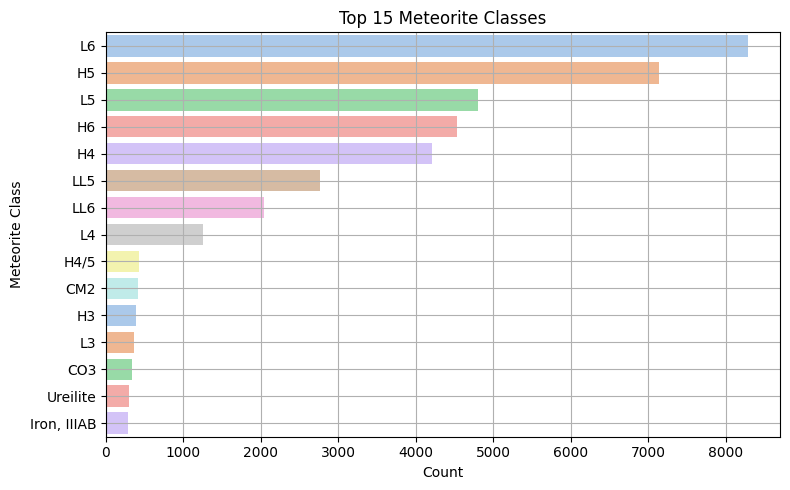

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(y='recclass',x='count',data=top_15_classes,palette = 'pastel')
plt.title('Top 15 Meteorite Classes')
plt.xlabel('Count')
plt.ylabel('Meteorite Class')
plt.tight_layout()
plt.grid()
plt.show()

### Top 15 Years of Meteroite Frequency

In [22]:
top_15_years=df['year'].value_counts().head(15).reset_index()
print(top_15_years)

      year  count
0   2003.0   3323
1   1979.0   3046
2   1998.0   2697
3   2006.0   2456
4   1988.0   2296
5   2002.0   2078
6   2004.0   1940
7   2000.0   1792
8   1997.0   1696
9   1999.0   1691
10  2001.0   1650
11  1990.0   1518
12  2009.0   1497
13  1986.0   1375
14  2007.0   1189


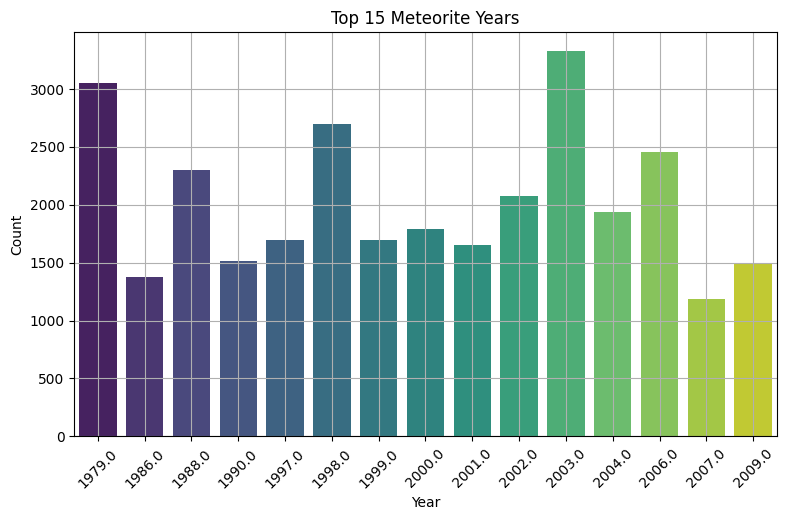

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_15_years['year'],y=top_15_years['count'],palette = 'viridis')
plt.title('Top 15 Meteorite Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Top 10 Meteroites by Mass

In [24]:
top_mass = df.groupby(['name'])['mass_(g)'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_mass)

              name    mass_(g)
0             Hoba  60000000.0
1        Cape York  58200000.0
2  Campo del Cielo  50000000.0
3    Canyon Diablo  30000000.0
4          Armanty  28000000.0
5           Gibeon  26000000.0
6       Chupaderos  24300000.0
7      Mundrabilla  24000000.0
8     Sikhote-Alin  23000000.0
9       Bacubirito  22000000.0


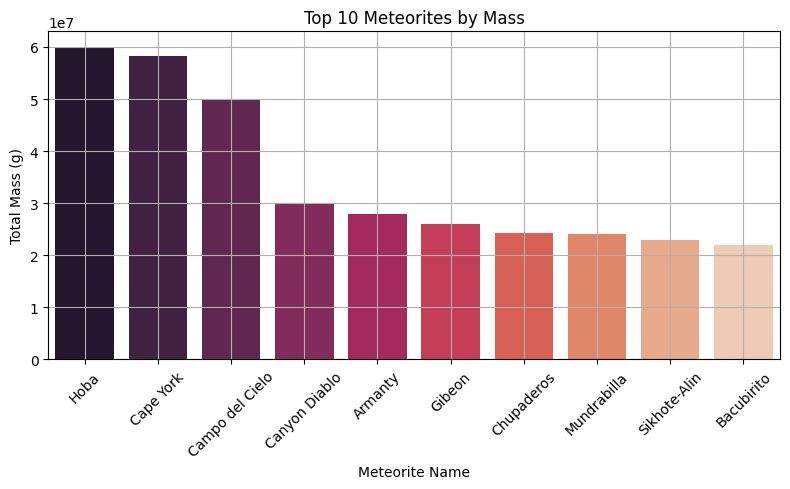

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='name',y='mass_(g)',data=top_mass,palette = 'rocket')
plt.title('Top 10 Meteorites by Mass')
plt.xlabel('Meteorite Name')
plt.ylabel('Total Mass (g)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

<div style="background-color: #EAF4FF; padding: 15px; border-radius: 10px; border: 1px solid #B0C4DE; font-family: Arial, sans-serif; color: #333333;">

  <h3 style="color: #444555; font-weight: normal;">If you found this notebook helpful, consider giving it an upvote! 👍</h3>
  <p style="font-size: 1.1em; color: #555555;">Your support encourages continued work in this domain. Feel free to leave your thoughts, feedback, or suggestions in the comments section. Let’s collaborate to make data science impactful! 🚀</p>

</div>